<a href="https://colab.research.google.com/github/prpawan03/marvel-lvl2/blob/main/Task5/xgboost_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:


!pip install finta


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from finta import TA
import yfinance as yf
plt.style.use(style = 'seaborn')
%matplotlib inline

<ipython-input-3-d0d9f0614482>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style = 'seaborn')


In [12]:
stock = ['NVDA']
df = yf.download(stock,"2017-01-01","2024-02-01")
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,26.100000,26.592501,24.844999,25.502501,25.136068,150199600
2017-01-04,25.850000,26.375000,25.382500,26.097500,25.722517,119922000
2017-01-05,26.132500,26.455000,25.262501,25.434999,25.069538,98429600
2017-01-06,25.712500,26.062500,25.299999,25.775000,25.404650,82285600
2017-01-09,25.875000,27.000000,25.875000,26.820000,26.434639,91624800
...,...,...,...,...,...,...
2024-01-25,623.500000,627.190002,608.500000,616.169983,616.169983,48277700
2024-01-26,609.599976,617.830017,605.729980,610.309998,610.309998,39030900
2024-01-29,612.320007,624.890015,609.070007,624.650024,624.650024,34873300


Text(0, 0.5, 'Price in USD($)')

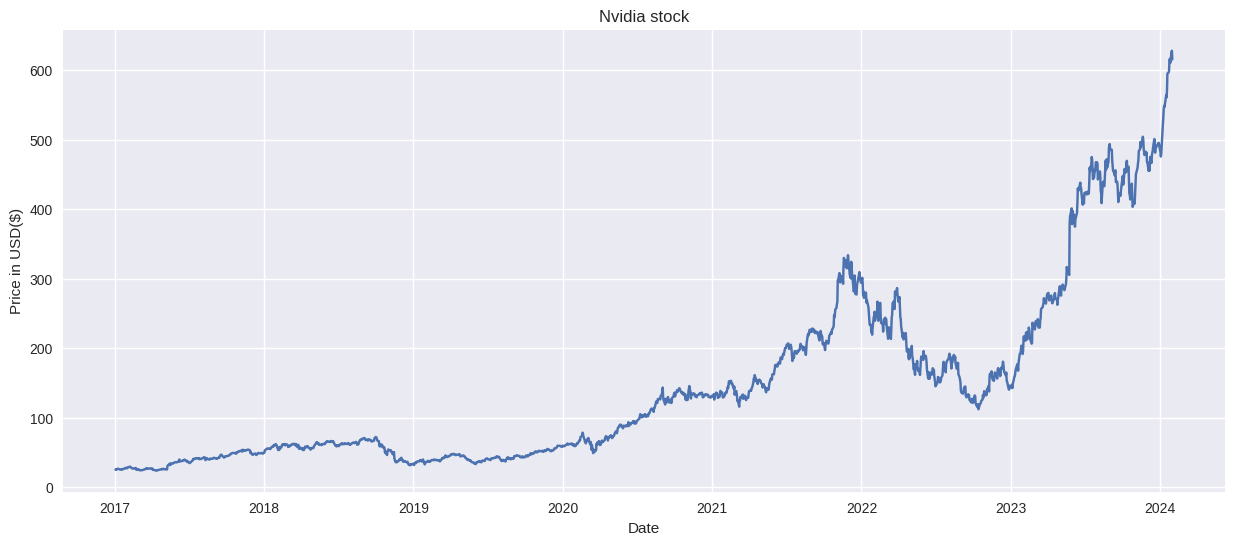

In [15]:
plt.figure(figsize = (15,6))
plt.title('Nvidia stock')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Price in USD($)')

In [16]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000,1.781000e+03
mean,145.340488,147.962667,142.647914,145.448980,145.149948,5.061248e+07
std,128.447737,130.582127,126.229430,128.562908,128.659497,2.544931e+07
min,24.002501,24.302500,23.792500,23.872499,23.559189,9.788400e+06
25%,48.750000,49.512501,47.912498,48.922501,48.511318,3.502440e+07
50%,103.675003,104.417503,100.877502,102.272499,101.981873,4.570760e+07
75%,197.179993,200.802505,192.779999,197.820007,197.581207,6.034000e+07
max,629.000000,634.929993,622.599976,627.739990,627.739990,3.692928e+08


In [17]:
df['SMA200']= TA.SMA(df,200)
df['RSI'] = TA.RSI(df)
df["BBWidth"] = TA.BBWIDTH(df)
df["Williams"] = TA.WILLIAMS(df)
df = df.iloc[200:,:]

In [18]:
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,SMA200,RSI,BBWidth,Williams
Date,,,,,,,,,,
2024-01-18,572.599976,576.000000,561.070007,571.070007,571.070007,49165000,421.610851,76.550232,0.251739,-4.795713
2024-01-19,579.890015,595.000000,572.250000,594.909973,594.909973,54210300,423.187151,80.738225,0.284893,-0.073914
2024-01-22,600.489990,603.309998,590.700012,596.539978,596.539978,45295500,424.797201,80.988235,0.304216,-5.203305
2024-01-23,595.700012,599.099976,585.849976,598.729980,598.729980,29465400,426.446801,81.338700,0.320519,-3.520112
2024-01-24,603.039978,628.489990,599.380005,613.619995,613.619995,56027100,428.163051,83.557978,0.338393,-9.692976
2024-01-25,623.500000,627.190002,608.500000,616.169983,616.169983,48277700,429.864950,83.910861,0.351616,-8.471435
2024-01-26,609.599976,617.830017,605.729980,610.309998,610.309998,39030900,431.558050,79.678715,0.355584,-13.597603
2024-01-29,612.320007,624.890015,609.070007,624.650024,624.650024,34873300,433.356550,82.062866,0.361254,-3.441139
2024-01-30,629.000000,634.929993,622.599976,627.739990,627.739990,41073500,435.172100,82.538265,0.361767,-7.187129


In [19]:
df["target"] = df.Close.shift(-1)
df.dropna(inplace = True)
df.head()

<ipython-input-19-f332eec3d0bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["target"] = df.Close.shift(-1)
<ipython-input-19-f332eec3d0bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


,Open,High,Low,Close,Adj Close,Volume,SMA200,RSI,BBWidth,Williams,target
Date,,,,,,,,,,,
2017-10-18,49.527500,49.535000,48.330002,49.395000,48.841022,56731600,34.277450,75.823244,0.186140,-6.027363,49.450001
2017-10-19,48.610001,49.500000,48.112499,49.450001,48.895397,57077200,34.394212,76.017110,0.196161,-5.022791,49.224998
2017-10-20,49.622501,49.897499,49.134998,49.224998,48.672920,45162000,34.513162,73.423267,0.201244,-12.221732,49.154999
2017-10-23,49.445000,49.712502,48.950001,49.154999,48.603714,42869600,34.630062,72.593373,0.192004,-13.846162,49.669998
2017-10-24,49.247501,49.687500,48.985001,49.669998,49.112938,40724400,34.744312,74.846011,0.182846,-4.419640,48.415001


In [21]:
def train_test_split(data, perc):
  data = data.values
  n = int(len(data) * (1-perc))
  return data[:n], data[n:]

In [23]:
train, test = train_test_split (df, 0.2)
train

array([[ 49.52750015,  49.53499985,  48.33000183, ...,   0.18613985,
         -6.02736271,  49.45000076],
       [ 48.61000061,  49.5       ,  48.11249924, ...,   0.19616071,
         -5.02279065,  49.22499847],
       [ 49.62250137,  49.89749908,  49.13499832, ...,   0.20124394,
        -12.22173154,  49.15499878],
       ...,
       [120.98000336, 124.98000336, 118.87000275, ...,   0.17869324,
        -41.85717119, 125.98999786],
       [125.08000183, 127.09999847, 120.63999939, ...,   0.18059946,
        -37.17903476, 132.61000061],
       [126.94000244, 133.        , 126.63999939, ...,   0.19465144,
        -13.8937633 , 128.96000671]])

In [25]:
print (len(df ))
print(len(train))
print(len(test))
train[0,:-1]

1580
1264
316


array([ 4.95275002e+01,  4.95349998e+01,  4.83300018e+01,  4.93950005e+01,
        4.88410225e+01,  5.67316000e+07,  3.42774499e+01,  7.58232437e+01,
        1.86139855e-01, -6.02736271e+00])

In [26]:
X = train [:,:-1]
y = train [:,-1]
y

array([ 49.45000076,  49.22499847,  49.15499878, ..., 125.98999786,
       132.61000061, 128.96000671])

In [49]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [3,20],'learning_rate': [0.05],'n_estimators': [500,1500],'colsample_bytree':[0.3,0.7]}

xgbr = XGBRegressor(seed = 20)
modl = GridSearchCV(estimator= xgbr,param_grid=params,scoring= "neg_mean_squared_error",verbose=1)

modl.fit(X,y)
print("Bestparameter:",modl.best_params_)
print("Lowest RMSE: ", (-modl.best_score_)**(1/2.0))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Bestparameter: {'colsample_bytree': 0.3, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}
Lowest RMSE:  17.725040902495014


In [51]:
from xgboost import XGBRegressor
model = XGBRegressor(objective = "reg:squarederror", n_estimators=500,colsample_bytree = 0.3, learning_rate = 0.05, max_depth =3 , gamma =1)
model.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [52]:
test[0,:]

array([ 1.28690002e+02,  1.33880005e+02,  1.27080002e+02,  1.28960007e+02,
        1.28869827e+02,  5.32953000e+07,  1.89420750e+02,  5.19269399e+01,
        1.96960322e-01, -1.91067833e+01,  1.31759995e+02])

In [53]:
val = np.array(test[0,:-1]).reshape(1,-1)
pred = model.predict(val)
pred

array([133.02287], dtype=float32)

In [54]:
def xgb_predict(train,val):
  train = np.array(train)
  X,y = train[:,:-1],train[:,-1]
  model = XGBRegressor(objective = 'reg:squarederror', n_estimators = 500, learning_rate = 0.05,colsample_bytree = 0.3, max_depth  = 3, gamma =5)
  model.fit(X,y)
  val = np.array(val).reshape(1,-1)
  pred = model.predict(val)
  return pred[0]

In [55]:
xgb_predict(train, test[0,:-1])

133.00725

In [56]:
def mape(actual, pred):
  actual,pred = np.array(actual),np.array(pred)
  mape = np.mean(np.abs((actual-pred)/actual))*100
  return mape

In [67]:
from sklearn.metrics import mean_squared_error

def validate(data, perc):
    predictions = []
    train, test = train_test_split(data, perc)
    history = [x for x in train]
    for i in range(len(test)):
        X_test, y_test = test[i, :-1], test[i, -1]
        pred = xgb_predict(history, X_test)
        predictions.append(pred)  # Append the prediction to predictions list
        history.append(np.append(X_test, pred))  # Append X_test and pred to history for next iteration

    error = mean_squared_error(test[:, -1], predictions, squared=False)
    MAPE = mape(test[:, -1], predictions)
    return error, MAPE, test[:, -1], predictions

rmse, MAPE, y, pred = validate(df, 0.2)


In [68]:
print (f"RMSE: {rmse}")
print (f"MAPE: {MAPE}")
print (y)
print(pred)

RMSE: 129.85689536380502
MAPE: 20.740756594398587
[131.75999451 138.33999634 134.97000122 135.42999268 132.19000244
 134.21000671 141.55999756 143.00999451 146.02000427 137.75999451
 157.5        163.27000427 162.94999695 166.66000366 159.1000061
 156.77000427 154.08999634 153.16999817 160.38000488 165.19000244
 162.69999695 158.27000427 156.38999939 169.22999573 171.3500061
 168.75999451 166.1000061  159.86999512 161.19999695 171.69000244
 170.00999451 175.3500061  180.72000122 176.74000549 169.52000427
 165.71000671 162.53999329 160.8500061  165.00999451 153.38999939
 152.05999756 141.21000671 140.36000061 146.02999878 146.13999939
 143.1499939  147.49000549 142.6499939  148.58999634 156.27999878
 159.08999634 160.00999451 165.11000061 168.99000549 177.02000427
 173.77000427 167.6499939  178.38999939 191.92999268 192.6499939
 193.22999573 198.02000427 203.6499939  191.61999512 195.36999512
 209.42999268 217.08999634 211.         210.88999939 221.72999573
 222.05000305 223.36999512 21

In [69]:
pred = np.array(pred)
test_pred = np.c_[test,pred]

In [71]:
df_TP = pd.DataFrame(test_pred, columns =['Open','High','Low','Close','Volume','SMA200','RSI','ATR','BBWidth','Williams','Target','Pred'])

Text(0, 0.5, 'Price in USD $')

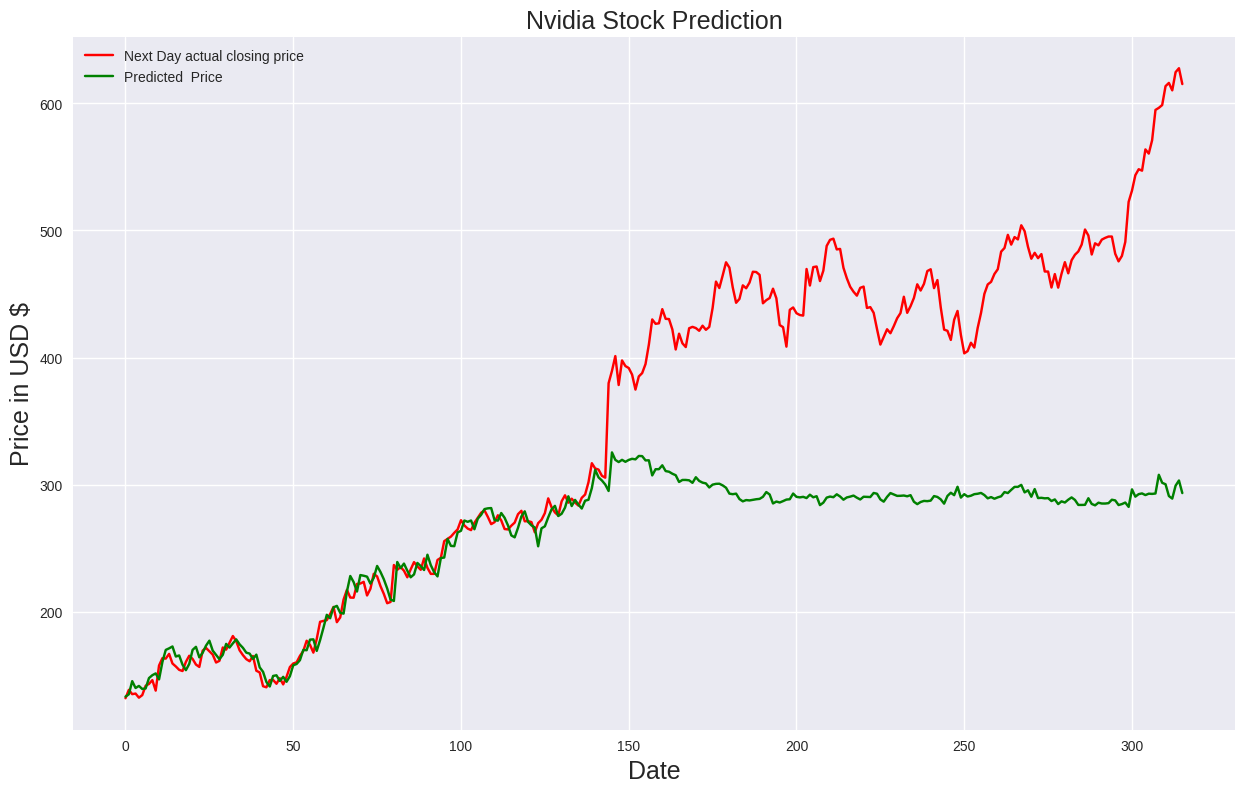

In [73]:
plt.figure(figsize = (15,9))
plt.title("Nvidia Stock Prediction",fontsize = 18)
plt.plot(df_TP['Target'], label ="Next Day actual closing price",color ="red")
plt.plot(df_TP['Pred'],label ="Predicted  Price", color ="green",alpha =1 )
plt.xlabel("Date",fontsize = 18)
plt.legend(loc = "upper left")
plt.ylabel("Price in USD $", fontsize =18)
